In [1]:
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

In [2]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
X, y = boston.data, boston.target

In [6]:
X.shape

(506, 13)

In [9]:
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


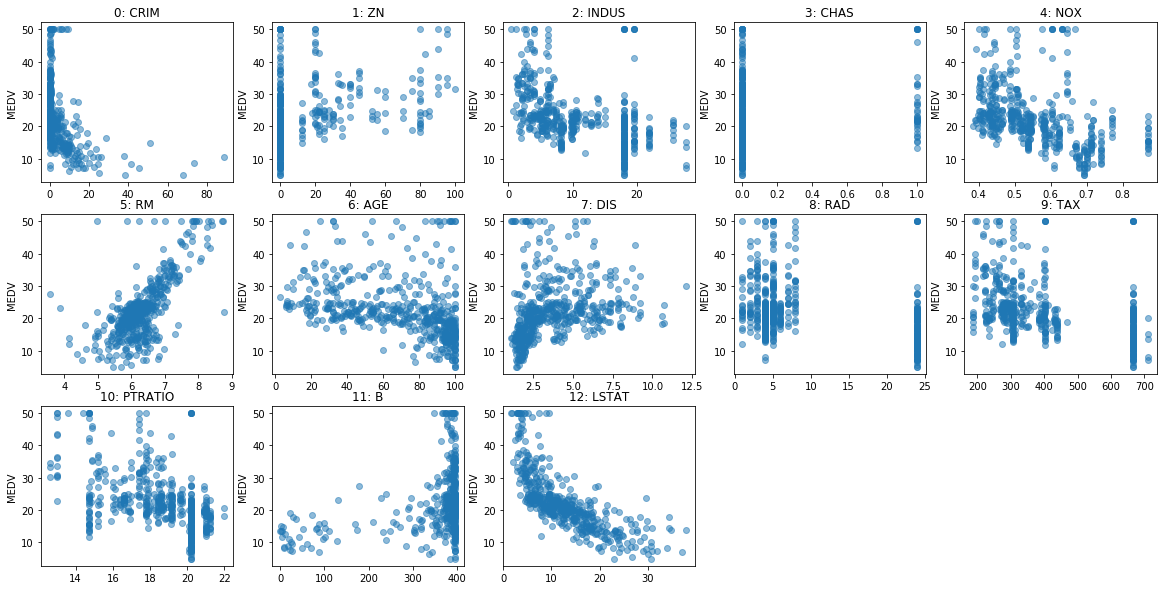

In [10]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, boston.feature_names[i]))
    ax.set_ylabel("MEDV")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.7160133196648382

In [13]:
from sklearn.ensemble import RandomForestRegressor
np.mean(cross_val_score(RandomForestRegressor(n_estimators=100), X_train, y_train, cv=10))

0.8390101533291565

In [14]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.7140510045941365

In [15]:
np.set_printoptions(suppress=True, precision=3)

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


In [17]:
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'alpha': array([   0.001  ,    0.00316,    0.01   ,    0.03162,    0.1    ,
          0.31623,    1.     ,    3.16228,   10.     ,   31.62278,
        100.     ,  316.22777, 1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

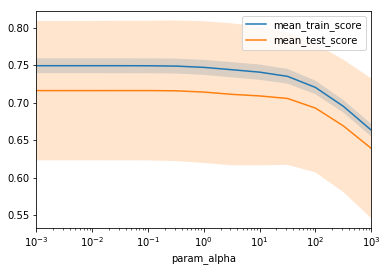

In [19]:
import pandas as pd
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [22]:
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000940,0.000430,0.716015,0.749152,0.001,{u'alpha': 0.001},5,0.783264,0.742750,0.703124,...,0.717695,0.749494,0.788799,0.743946,0.545312,0.764885,0.000519,0.000112,0.092758,0.009893
1,0.000545,0.000327,0.716018,0.749152,0.00316228,{u'alpha': 0.0031622776601683794},4,0.783242,0.742750,0.703110,...,0.717678,0.749494,0.788780,0.743946,0.545296,0.764885,0.000142,0.000151,0.092765,0.009893
2,0.000475,0.000247,0.716027,0.749151,0.01,{u'alpha': 0.01},3,0.783172,0.742750,0.703064,...,0.717626,0.749493,0.788719,0.743945,0.545244,0.764884,0.000096,0.000055,0.092785,0.009893
3,0.000646,0.000338,0.716049,0.749144,0.0316228,{u'alpha': 0.03162277660168379},2,0.782949,0.742743,0.702916,...,0.717463,0.749487,0.788527,0.743939,0.545076,0.764878,0.000232,0.000085,0.092849,0.009893
4,0.000508,0.000273,0.716060,0.749082,0.1,{u'alpha': 0.1},1,0.782228,0.742684,0.702439,...,0.716963,0.749434,0.787927,0.743885,0.544520,0.764819,0.000128,0.000121,0.093042,0.009896
5,0.000441,0.000237,0.715746,0.748658,0.316228,{u'alpha': 0.31622776601683794},6,0.779963,0.742285,0.700937,...,0.715563,0.749066,0.786153,0.743507,0.542678,0.764416,0.000078,0.000053,0.093549,0.009916
6,0.000416,0.000233,0.714051,0.746948,1,{u'alpha': 1.0},7,0.774383,0.740723,0.697210,...,0.712693,0.747534,0.781968,0.741947,0.537718,0.762809,0.000040,0.000040,0.094381,0.009996
7,0.000458,0.000227,0.711050,0.743822,3.16228,{u'alpha': 3.1622776601683795},8,0.766435,0.737959,0.691934,...,0.710270,0.744609,0.775827,0.739018,0.529517,0.759936,0.000075,0.000024,0.094525,0.010129
8,0.000433,0.000224,0.708935,0.740584,10,{u'alpha': 10.0},9,0.758370,0.735058,0.687116,...,0.712196,0.741394,0.769062,0.735945,0.519966,0.757140,0.000068,0.000029,0.092477,0.010159
9,0.000406,0.000224,0.705528,0.734989,31.6228,{u'alpha': 31.622776601683793},10,0.743153,0.729920,0.679688,...,0.717353,0.735645,0.757018,0.730753,0.507050,0.752431,0.000018,0.000020,0.088310,0.009830


In [23]:
from sklearn.preprocessing import PolynomialFeatures, scale
X, y = boston.data, boston.target
#X, y = data.data, data.target
X_poly = PolynomialFeatures(include_bias=False).fit_transform(SimpleImputer().fit_transform(scale(X)))
print(X_poly.shape)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

(506, 104)


In [24]:
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.8065247901762195

In [25]:
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.8227099613418705

In [26]:
param_grid = {'alpha': np.logspace(-3, 3, 13)}

grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'alpha': array([   0.001  ,    0.00316,    0.01   ,    0.03162,    0.1    ,
          0.31623,    1.     ,    3.16228,   10.     ,   31.62278,
        100.     ,  316.22777, 1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

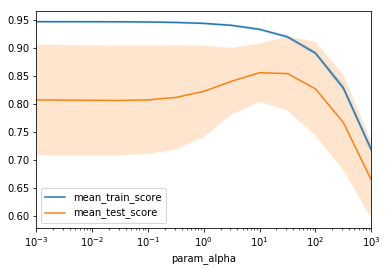

In [27]:
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [28]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 10.0}
0.8560976200047946


In [29]:
grid.score(X_test, y_test)

0.8055433024041887

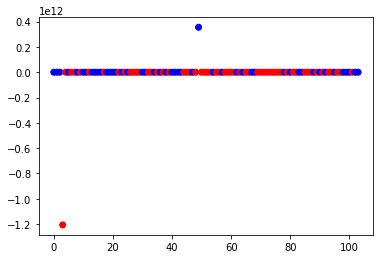

In [31]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_poly.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")

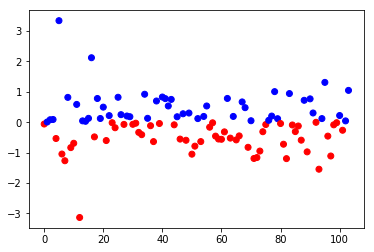

In [32]:
ridge = grid.best_estimator_
plt.scatter(range(X_poly.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")

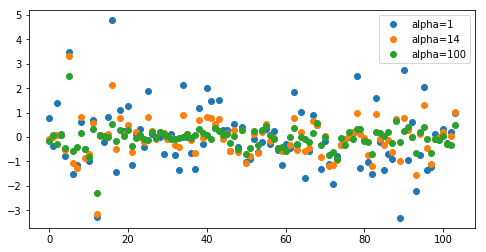

In [34]:


ridge100 = Ridge(alpha=100).fit(X_train, y_train)
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
plt.figure(figsize=(8, 4))

plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge.coef_, 'o', label="alpha=14")
plt.plot(ridge100.coef_, 'o', label="alpha=100")
plt.legend()

Text(0,0.5,'coefficient')

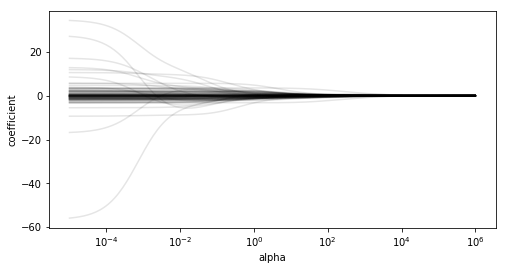

In [35]:
n_alphas = 200
alphas = np.logspace(-5, 6, n_alphas)
plt.figure(figsize=(8, 4))
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.plot(alphas, coefs, c='k', alpha=.1)
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("coefficient")

(-1, 1)

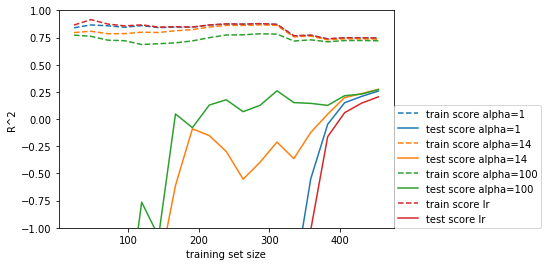

In [36]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=14), "alpha=14")
plot_learning_curve(Ridge(alpha=100), "alpha=100")

plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.ylim(-1, 1)

# LASSO

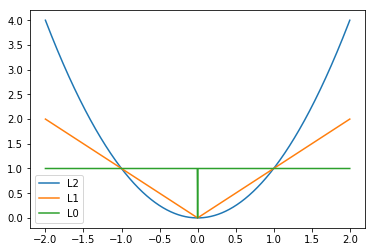

In [37]:
line = np.linspace(-2, 2, 1001)
plt.plot(line, line ** 2, label="L2")
plt.plot(line, np.abs(line), label="L1")
plt.plot(line, line!=0, label="L0")
plt.legend()

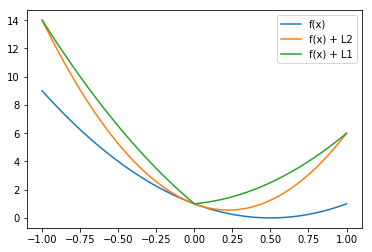

In [38]:
line = np.linspace(-1, 1, 1001)

alpha_l1 = 5
alpha_l2 = 5

f_x = (2 * line - 1) ** 2
f_x_l2 =  f_x + alpha_l2 * line ** 2
f_x_l1 =  f_x + alpha_l1 * np.abs(line)

plt.plot(line, f_x, label="f(x)")
plt.plot(line, f_x_l2, label="f(x) + L2")
plt.plot(line, f_x_l1, label="f(x) + L1")
plt.legend()